In [1]:
cd

C:\Users\kelly


In [3]:
cd Desktop/DSC/106/PEA/Project2

C:\Users\kelly\Desktop\DSC\106\PEA\Project2


In [5]:
# Disposition	    Description
# Substantiated	    The alleged conduct occurred and it violated the rules. (A breakdown of the types of discipline the CCRB can recommend is here: https://www1.nyc.gov/site/ccrb/prosecution/police-discipline.page) The NYPD can choose to ignore those recommendations. It has discretion over what, if any, discipline is imposed.)
# Exonerated	    The alleged conduct occurred but did not violate the NYPD’s rules, which often give officers significant discretion over use of force.
# Unsubstantiated	The CCRB has fully investigated but could not affirmatively conclude both that the conduct occurred and that it broke the rules.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [6]:
df.columns

Index(['unique_mos_id', 'first_name', 'last_name', 'command_now', 'shield_no',
       'complaint_id', 'month_received', 'year_received', 'month_closed',
       'year_closed', 'command_at_incident', 'rank_abbrev_incident',
       'rank_abbrev_now', 'rank_now', 'rank_incident', 'mos_ethnicity',
       'mos_gender', 'mos_age_incident', 'complainant_ethnicity',
       'complainant_gender', 'complainant_age_incident', 'fado_type',
       'allegation', 'precinct', 'contact_reason', 'outcome_description',
       'board_disposition', 'age_bin_complainant', 'age_bin_mos'],
      dtype='object')

In [121]:
df = pd.read_csv('data.csv')
df['age_bin_complainant'] = pd.cut(df['complainant_age_incident'], bins=[0, 15, 20, 30, 40, 50, 60, 70, 80, 90, 100], labels=['<15', '16-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100'])
df['age_bin_mos'] = pd.cut(df['mos_age_incident'], bins=[0, 15, 20, 30, 40, 50, 60, 70, 80, 90, 100], labels=['<15', '16-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100'])
df['board_disposition'] = df['board_disposition'].apply(
    lambda x: 'Unsubstantiated' if isinstance(x, str) and 'unsubstantiated' in x.lower() else
              ('Substantiated' if isinstance(x, str) and 'substantiated' in x.lower() else x)
)
df

,unique_mos_id,first_name,last_name,command_now,shield_no,complaint_id,month_received,year_received,month_closed,year_closed,...,complainant_gender,complainant_age_incident,fado_type,allegation,precinct,contact_reason,outcome_description,board_disposition,age_bin_complainant,age_bin_mos
0,10004,Jonathan,Ruiz,078 PCT,8409,42835,7,2019,5,2020,...,Female,38.0,Abuse of Authority,Failure to provide RTKA card,78.0,Report-domestic dispute,No arrest made or summons issued,Substantiated,31-40,31-40
1,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,...,Male,26.0,Discourtesy,Action,67.0,Moving violation,Moving violation summons issued,Substantiated,21-30,21-30
2,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,...,Male,26.0,Offensive Language,Race,67.0,Moving violation,Moving violation summons issued,Substantiated,21-30,21-30
3,10007,John,Sears,078 PCT,5952,26146,7,2012,9,2013,...,Male,45.0,Abuse of Authority,Question,67.0,PD suspected C/V of violation/crime - street,No arrest made or summons issued,Substantiated,41-50,21-30
4,10009,Noemi,Sierra,078 PCT,24058,40253,8,2018,2,2019,...,NaN,16.0,Force,Physical force,67.0,Report-dispute,Arrest - other violation/crime,Substantiated,16-20,31-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33353,9992,Tomasz,Pulawski,078 PCT,2642,35671,8,2016,2,2017,...,Male,21.0,Discourtesy,Word,66.0,Moving violation,Moving violation summons issued,Unsubstantiated,21-30,31-40
33354,9992,Tomasz,Pulawski,078 PCT,2642,35671,8,2016,2,2017,...,Male,21.0,Abuse of Authority,Interference with recording,66.0,Moving violation,Moving violation summons issued,Unsubstantiated,21-30,31-40
33355,9992,Tomasz,Pulawski,078 PCT,2642,35671,8,2016,2,2017,...,Male,21.0,Abuse of Authority,Search (of person),66.0,Moving violation,Moving violation summons issued,Substantiated,21-30,31-40
33356,9992,Tomasz,Pulawski,078 PCT,2642,35671,8,2016,2,2017,...,Male,21.0,Abuse of Authority,Vehicle search,66.0,Moving violation,Moving violation summons issued,Substantiated,21-30,31-40


In [7]:
grouped_df = df.groupby(['age_bin_complainant', 'board_disposition']).size().reset_index(name='count').sort_values(by='count', ascending=False)
grouped_df



C:\Users\kelly\AppData\Local\Temp\ipykernel_8424\4248335319.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = df.groupby(['age_bin_complainant', 'board_disposition']).size().reset_index(name='count').sort_values(by='count', ascending=False)


,age_bin_complainant,board_disposition,count
8,21-30,Unsubstantiated,4884
11,31-40,Unsubstantiated,3280
6,21-30,Exonerated,2746
7,21-30,Substantiated,2447
14,41-50,Unsubstantiated,2195
9,31-40,Exonerated,1861
10,31-40,Substantiated,1721
5,16-20,Unsubstantiated,1683
12,41-50,Exonerated,1261
13,41-50,Substantiated,1105


In [27]:
total_counts

,age_bin_mos,total
0,<15,0
1,16-20,1
2,21-30,14569
3,31-40,15259
4,41-50,3369
5,51-60,160
6,61-70,0
7,71-80,0
8,81-90,0
9,91-100,0


C:\Users\kelly\AppData\Local\Temp\ipykernel_8424\2297583028.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = df.groupby(['age_bin_mos', 'board_disposition']).size().reset_index(name='count').sort_values(by='count', ascending=False)
C:\Users\kelly\AppData\Local\Temp\ipykernel_8424\2297583028.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_counts = grouped_df.groupby('age_bin_mos')['count'].sum().reset_index(name='total')


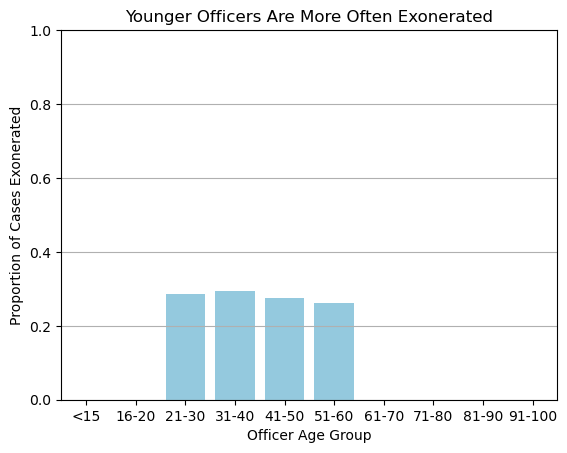

In [28]:
grouped_df = df.groupby(['age_bin_mos', 'board_disposition']).size().reset_index(name='count').sort_values(by='count', ascending=False)
exonerated_df = grouped_df[grouped_df['board_disposition'] == 'Exonerated']


total_counts = grouped_df.groupby('age_bin_mos')['count'].sum().reset_index(name='total')
merged = exonerated_df.merge(total_counts, on='age_bin_mos')
merged['proportion'] = (merged['count'] / merged['total']).fillna(0)
filtered_merged = merged[merged['proportion'] > 0]


sns.barplot(data=filtered_merged, x='age_bin_mos', y='proportion', color='skyblue')
plt.title('Younger Officers Are More Often Exonerated')
plt.ylabel('Proportion of Cases Exonerated')
plt.xlabel('Officer Age Group')
plt.ylim(0, 1)
plt.grid(axis='y')


In [11]:
grouped_df

,age_bin_mos,board_disposition,count
11,31-40,Unsubstantiated,7046
8,21-30,Unsubstantiated,6737
9,31-40,Exonerated,4479
6,21-30,Exonerated,4164
10,31-40,Substantiated,3734
7,21-30,Substantiated,3668
14,41-50,Unsubstantiated,1603
12,41-50,Exonerated,924
13,41-50,Substantiated,842
17,51-60,Unsubstantiated,61


In [40]:
pivot_df = grouped_df.pivot(index='age_bin_mos', columns='board_disposition', values='count')
pivot_df = pivot_df[(pivot_df != 0).any(axis=1)]
pivot_df



board_disposition,Exonerated,Substantiated,Unsubstantiated
age_bin_mos,,,
16-20,0,0,1
21-30,4164,3668,6737
31-40,4479,3734,7046
41-50,924,842,1603
51-60,42,57,61


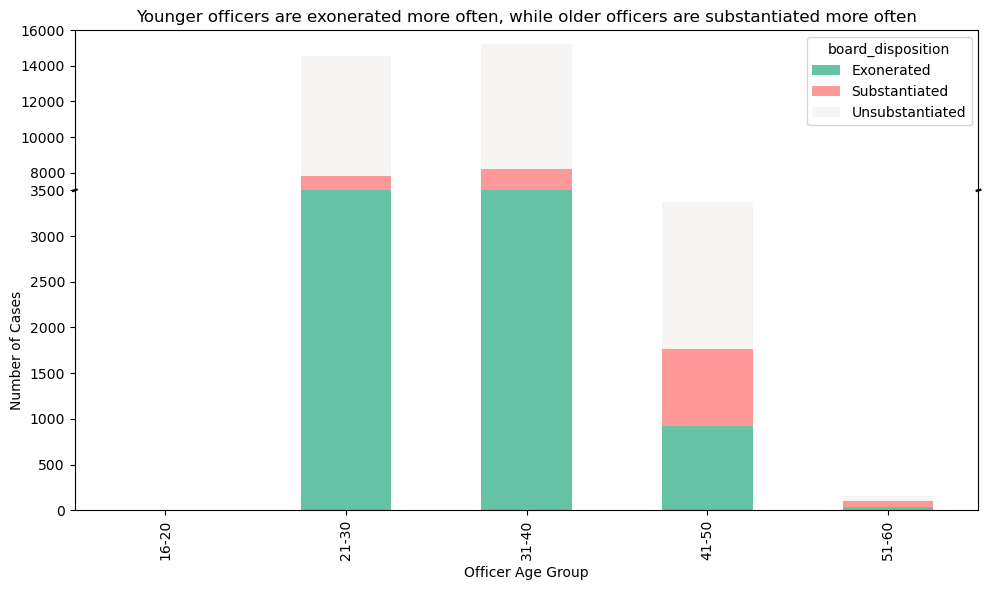

In [192]:
import matplotlib.pyplot as plt

# Create the figure and two subplots (one above the other, sharing the x-axis)
fig, (ax_top, ax_bottom) = plt.subplots(2, 1, sharex=True, figsize=(10, 6), gridspec_kw={'height_ratios': [1, 2]})


pivot_df = grouped_df.pivot(index='age_bin_mos', columns='board_disposition', values='count')
pivot_df = pivot_df[(pivot_df != 0).any(axis=1)]


# Plot on both axes
pivot_df.plot(kind='bar', stacked=True, ax=ax_top, color=[ '#66c2a5', '#ff9999', '#f6f5f4'], legend=True)
pivot_df.plot(kind='bar', stacked=True, ax=ax_bottom, color=[ '#66c2a5', '#ff9999', '#f6f5f4'], legend=False)

# Set y-axis limits for each subplot
ax_top.set_ylim(7000, 16000)    # Focused on high range
ax_bottom.set_ylim(0, 3500)     # Lower range

# Hide the spines between the two plots
ax_top.spines['bottom'].set_visible(False)
ax_bottom.spines['top'].set_visible(False)
ax_top.tick_params(labeltop=False)  # Don't show top tick labels
ax_bottom.xaxis.tick_bottom()

# Add diagonal lines to show axis break
d = .002  # Size of the diagonal lines
kwargs = dict(transform=ax_top.transAxes, color='k', clip_on=False)
ax_top.plot((-d, +d), (-d, +d), **kwargs)
ax_top.plot((1 - d, 1 + d), (-d, +d), **kwargs)

kwargs.update(transform=ax_bottom.transAxes)
ax_bottom.plot((-d, +d), (1 - d, 1 + d), **kwargs)
ax_bottom.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

# Labels and titles
ax_bottom.set_xlabel('Officer Age Group')
ax_bottom.set_ylabel('Number of Cases')
ax_top.set_title('Younger officers are exonerated more often, while older officers are substantiated more often')

plt.tight_layout()
plt.subplots_adjust(hspace=0)
plt.show()


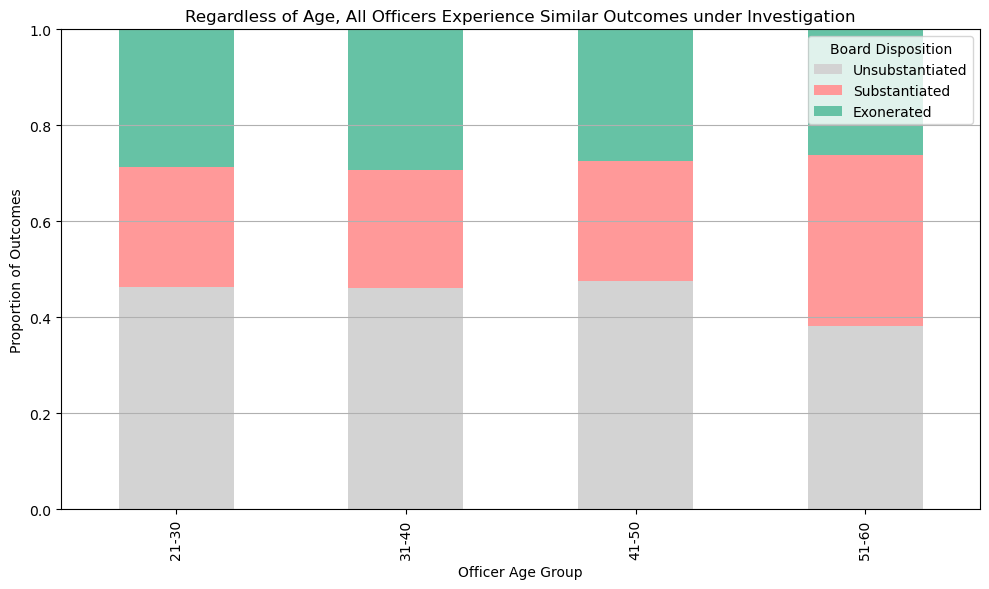

In [77]:
import matplotlib.pyplot as plt

# Create pivot table (as before)
pivot_df = grouped_df.pivot(index='age_bin_mos', columns='board_disposition', values='count')

# Drop rows where all values are 0
pivot_df = pivot_df[(pivot_df != 0).any(axis=1)]

# Normalize to get proportions (i.e., rates)
proportion_df = pivot_df.div(pivot_df.sum(axis=1), axis=0)

# Optional: Order age bins
ordered_bins = ['21-30', '31-40', '41-50', '51-60']
proportion_df = proportion_df.reindex(ordered_bins)

colors = ['#d3d3d3', '#ff9999', '#66c2a5']  # Grey, alarming red, soothing green
proportion_df = proportion_df[['Unsubstantiated', 'Substantiated', 'Exonerated']]

proportion_df.plot(kind='bar', stacked=True, color=colors, figsize=(10, 6))

plt.title('Regardless of Age, All Officers Experience Similar Outcomes under Investigation')
plt.xlabel('Officer Age Group')
plt.ylabel('Proportion of Outcomes')
plt.ylim(0, 1)
plt.legend(title='Board Disposition')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [45]:
df.columns

Index(['unique_mos_id', 'first_name', 'last_name', 'command_now', 'shield_no',
       'complaint_id', 'month_received', 'year_received', 'month_closed',
       'year_closed', 'command_at_incident', 'rank_abbrev_incident',
       'rank_abbrev_now', 'rank_now', 'rank_incident', 'mos_ethnicity',
       'mos_gender', 'mos_age_incident', 'complainant_ethnicity',
       'complainant_gender', 'complainant_age_incident', 'fado_type',
       'allegation', 'precinct', 'contact_reason', 'outcome_description',
       'board_disposition', 'age_bin_complainant', 'age_bin_mos'],
      dtype='object')

<Axes: xlabel='rank_diff'>

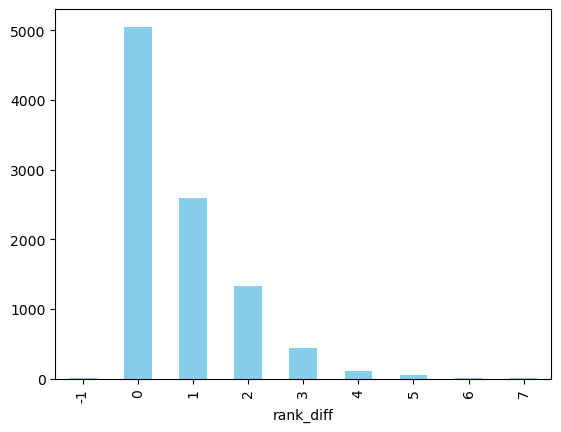

In [60]:
rank_mapping = {
    'Police Officer': 0,
    'Detective': 1,
    'Sergeant': 2,
    'Lieutenant': 3,
    'Captain': 4,
    'Deputy Inspector': 5,
    'Inspector': 6,
    'Chiefs and other ranks': 7
}

df['rank_now_mapped'] = df['rank_now'].map(rank_mapping)
df['rank_incident_mapped'] = df['rank_incident'].map(rank_mapping)
df['rank_diff'] = df['rank_now_mapped'] - df['rank_incident_mapped']
exonerated = df[df['board_disposition'] == 'Exonerated']
exonerated['rank_diff'].value_counts().sort_index().plot(kind='bar', color='skyblue')

In [92]:
df[['rank_now_mapped',	'rank_incident_mapped',	'rank_diff',	'rank_change']]
df.groupby('precinct').size().reset_index(name='count').sort_values(by='count', ascending=False)

,precinct,count
47,75.0,2172
46,73.0,1163
27,44.0,1139
29,46.0,1120
40,67.0,1119
...,...,...
9,17.0,76
69,111.0,37
0,0.0,21
13,22.0,12


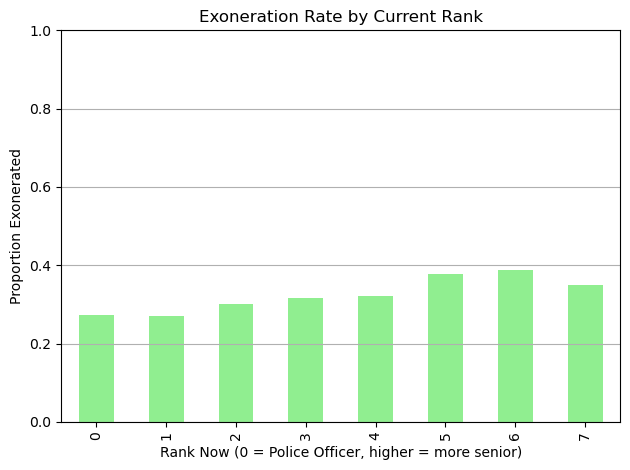

In [62]:
# Calculate exoneration rate by current rank
rank_exoneration = df.groupby('rank_now_mapped')['board_disposition'].value_counts(normalize=True).unstack().fillna(0)

# Plot
rank_exoneration['Exonerated'].plot(
    kind='bar', color='lightgreen', title='Exoneration Rate by Current Rank'
)
plt.xlabel('Rank Now (0 = Police Officer, higher = more senior)')
plt.ylabel('Proportion Exonerated')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


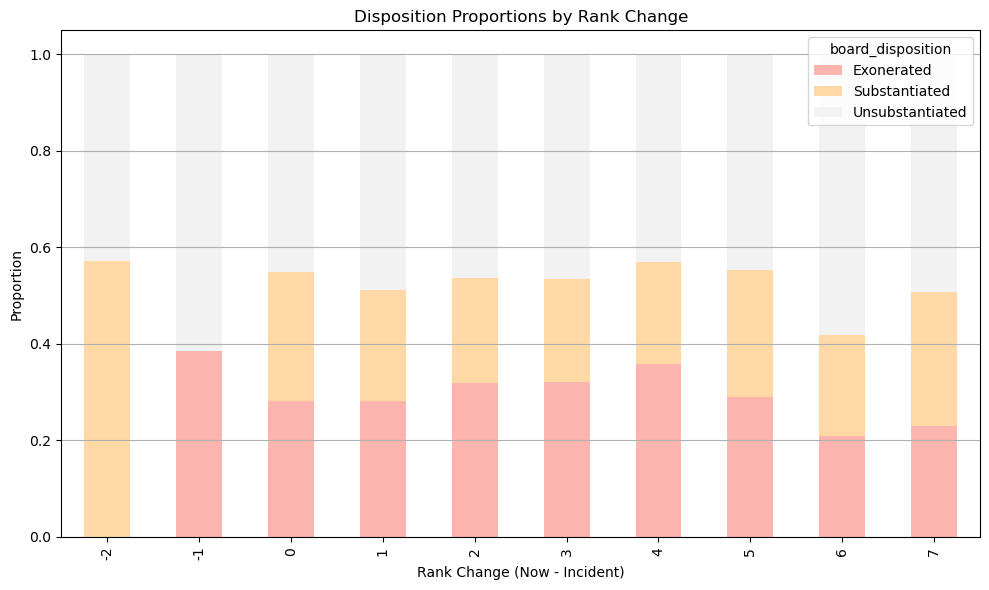

In [63]:
# Create pivot table for stacked bar plot
disposition_by_diff = df.groupby(['rank_diff', 'board_disposition']).size().unstack().fillna(0)

# Normalize to show proportions
disposition_by_diff_prop = disposition_by_diff.div(disposition_by_diff.sum(axis=1), axis=0)

# Plot stacked bar chart of dispositions by rank difference
disposition_by_diff_prop.plot(
    kind='bar', stacked=True, colormap='Pastel1', figsize=(10, 6)
)
plt.title('Disposition Proportions by Rank Change')
plt.xlabel('Rank Change (Now - Incident)')
plt.ylabel('Proportion')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [107]:
df

,unique_mos_id,first_name,last_name,command_now,shield_no,complaint_id,month_received,year_received,month_closed,year_closed,...,precinct,contact_reason,outcome_description,board_disposition,age_bin_complainant,age_bin_mos,rank_now_mapped,rank_incident_mapped,rank_diff,rank_change
0,10004,Jonathan,Ruiz,078 PCT,8409,42835,7,2019,5,2020,...,78.0,Report-domestic dispute,No arrest made or summons issued,Substantiated,31-40,31-40,0,0,0,Same Rank
1,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,...,67.0,Moving violation,Moving violation summons issued,Substantiated,21-30,21-30,0,0,0,Same Rank
2,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,...,67.0,Moving violation,Moving violation summons issued,Substantiated,21-30,21-30,0,0,0,Same Rank
3,10007,John,Sears,078 PCT,5952,26146,7,2012,9,2013,...,67.0,PD suspected C/V of violation/crime - street,No arrest made or summons issued,Substantiated,41-50,21-30,0,0,0,Same Rank
4,10009,Noemi,Sierra,078 PCT,24058,40253,8,2018,2,2019,...,67.0,Report-dispute,Arrest - other violation/crime,Substantiated,16-20,31-40,0,0,0,Same Rank
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33353,9992,Tomasz,Pulawski,078 PCT,2642,35671,8,2016,2,2017,...,66.0,Moving violation,Moving violation summons issued,Unsubstantiated,21-30,31-40,2,0,2,Promoted
33354,9992,Tomasz,Pulawski,078 PCT,2642,35671,8,2016,2,2017,...,66.0,Moving violation,Moving violation summons issued,Unsubstantiated,21-30,31-40,2,0,2,Promoted
33355,9992,Tomasz,Pulawski,078 PCT,2642,35671,8,2016,2,2017,...,66.0,Moving violation,Moving violation summons issued,Substantiated,21-30,31-40,2,0,2,Promoted
33356,9992,Tomasz,Pulawski,078 PCT,2642,35671,8,2016,2,2017,...,66.0,Moving violation,Moving violation summons issued,Substantiated,21-30,31-40,2,0,2,Promoted


In [123]:
df_clean = df[df['precinct'].notna()]
df_clean['precinct'] = df_clean['precinct'].astype(int)
df_clean

C:\Users\kelly\AppData\Local\Temp\ipykernel_8424\624727350.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['precinct'] = df_clean['precinct'].astype(int)


,unique_mos_id,first_name,last_name,command_now,shield_no,complaint_id,month_received,year_received,month_closed,year_closed,...,complainant_gender,complainant_age_incident,fado_type,allegation,precinct,contact_reason,outcome_description,board_disposition,age_bin_complainant,age_bin_mos
0,10004,Jonathan,Ruiz,078 PCT,8409,42835,7,2019,5,2020,...,Female,38.0,Abuse of Authority,Failure to provide RTKA card,78,Report-domestic dispute,No arrest made or summons issued,Substantiated,31-40,31-40
1,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,...,Male,26.0,Discourtesy,Action,67,Moving violation,Moving violation summons issued,Substantiated,21-30,21-30
2,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,...,Male,26.0,Offensive Language,Race,67,Moving violation,Moving violation summons issued,Substantiated,21-30,21-30
3,10007,John,Sears,078 PCT,5952,26146,7,2012,9,2013,...,Male,45.0,Abuse of Authority,Question,67,PD suspected C/V of violation/crime - street,No arrest made or summons issued,Substantiated,41-50,21-30
4,10009,Noemi,Sierra,078 PCT,24058,40253,8,2018,2,2019,...,NaN,16.0,Force,Physical force,67,Report-dispute,Arrest - other violation/crime,Substantiated,16-20,31-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33353,9992,Tomasz,Pulawski,078 PCT,2642,35671,8,2016,2,2017,...,Male,21.0,Discourtesy,Word,66,Moving violation,Moving violation summons issued,Unsubstantiated,21-30,31-40
33354,9992,Tomasz,Pulawski,078 PCT,2642,35671,8,2016,2,2017,...,Male,21.0,Abuse of Authority,Interference with recording,66,Moving violation,Moving violation summons issued,Unsubstantiated,21-30,31-40
33355,9992,Tomasz,Pulawski,078 PCT,2642,35671,8,2016,2,2017,...,Male,21.0,Abuse of Authority,Search (of person),66,Moving violation,Moving violation summons issued,Substantiated,21-30,31-40
33356,9992,Tomasz,Pulawski,078 PCT,2642,35671,8,2016,2,2017,...,Male,21.0,Abuse of Authority,Vehicle search,66,Moving violation,Moving violation summons issued,Substantiated,21-30,31-40


In [129]:
counted_df.sort_values(by='count', ascending=False)

,precinct,count
47,75,2172
46,73,1163
27,44,1139
29,46,1120
40,67,1119
...,...,...
9,17,76
69,111,37
0,0,21
13,22,12


C:\Users\kelly\AppData\Local\Temp\ipykernel_23280\1961406222.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_counts['precinct'] = total_counts['precinct'].astype(int)


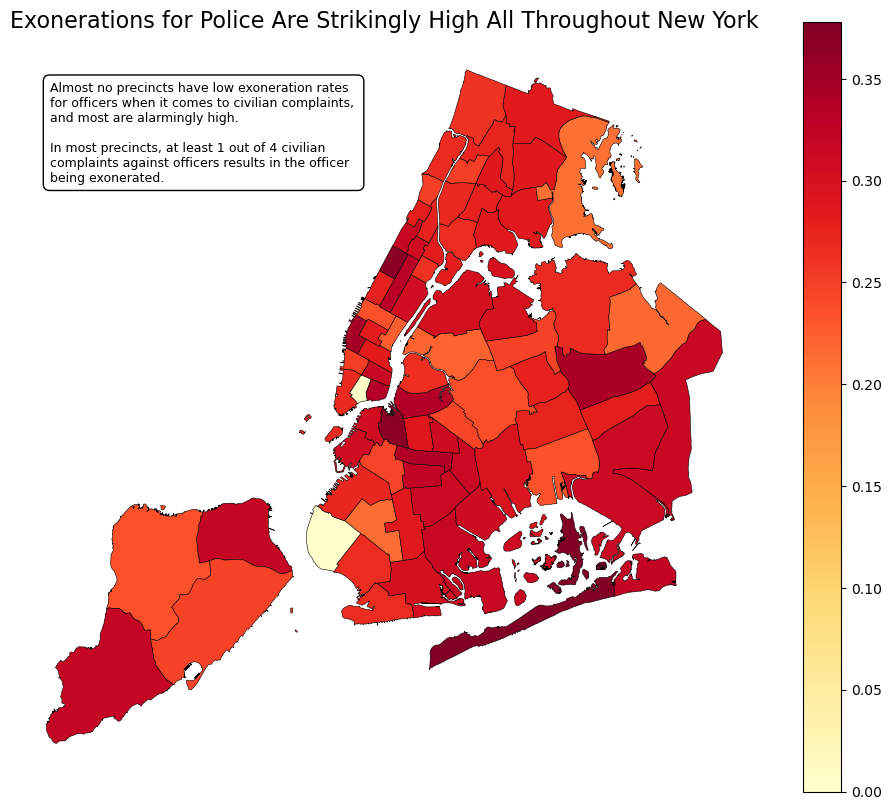

In [27]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load NYC precincts shapefile (GeoJSON)
precincts_gdf = gpd.read_file("nyc-police-precincts.geojson")
df = pd.read_csv('data.csv')


# Total complaints (regardless of disposition)
total_counts = df[df['precinct'].notna()]
total_counts['precinct'] = total_counts['precinct'].astype(int)
total_counts = total_counts.groupby('precinct').size().reset_index(name='total_count')



# Exonerated counts (you already did this)
exonerated = df[df['precinct'].notna()]
exonerated = exonerated[exonerated['board_disposition'] == 'Exonerated']
exonerated['precinct'] = exonerated['precinct'].astype(int)
exonerated_counts = exonerated.groupby('precinct').size().reset_index(name='exonerated_count')

# Merge total and exonerated counts
rates_df = pd.merge(total_counts, exonerated_counts, on='precinct', how='left')
rates_df['exonerated_count'] = rates_df['exonerated_count'].fillna(0)

# Calculate proportion
rates_df['exoneration_rate'] = rates_df['exonerated_count'] / rates_df['total_count']


precincts_gdf['precinct'] = precincts_gdf['precinct'].astype(int)

merged = precincts_gdf.merge(rates_df, on='precinct', how='left')


fig, ax = plt.subplots(1, 1, figsize=(12, 10))
# Mask out precincts with exoneration rates below a threshold
merged['exoneration_rate'] = merged['exoneration_rate'].where(merged['exoneration_rate'] > 0.2, 0)

merged.plot(column='exoneration_rate',
            ax=ax,
            legend=True,
            cmap='YlOrRd',
            edgecolor='black',
            linewidth=0.4,
            missing_kwds={"color": "lightgrey", "label": "No Data"})

ax.set_title("Exonerations for Police Are Strikingly High All Throughout New York", fontsize=16)
ax.axis('off')
# Add annotation textbox
ax.text(
    0.05, 0.8,  # X, Y position in *axes fraction* (from 0 to 1)
    'Almost no precincts have low exoneration rates\nfor officers when it comes to civilian complaints, \nand most are alarmingly high.\n\nIn most precincts, at least 1 out of 4 civilian \ncomplaints against officers results in the officer\nbeing exonerated.',
    fontsize=9,
    ha='left',  # horizontal alignment
    va='bottom', # vertical alignment
    transform=ax.transAxes,  # coordinate system: axes fraction
    bbox=dict(boxstyle='round,pad=0.5', facecolor='white', edgecolor='black')
)

plt.show()



C:\Users\kelly\AppData\Local\Temp\ipykernel_23280\3972420241.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_counts['precinct'] = total_counts['precinct'].astype(int)


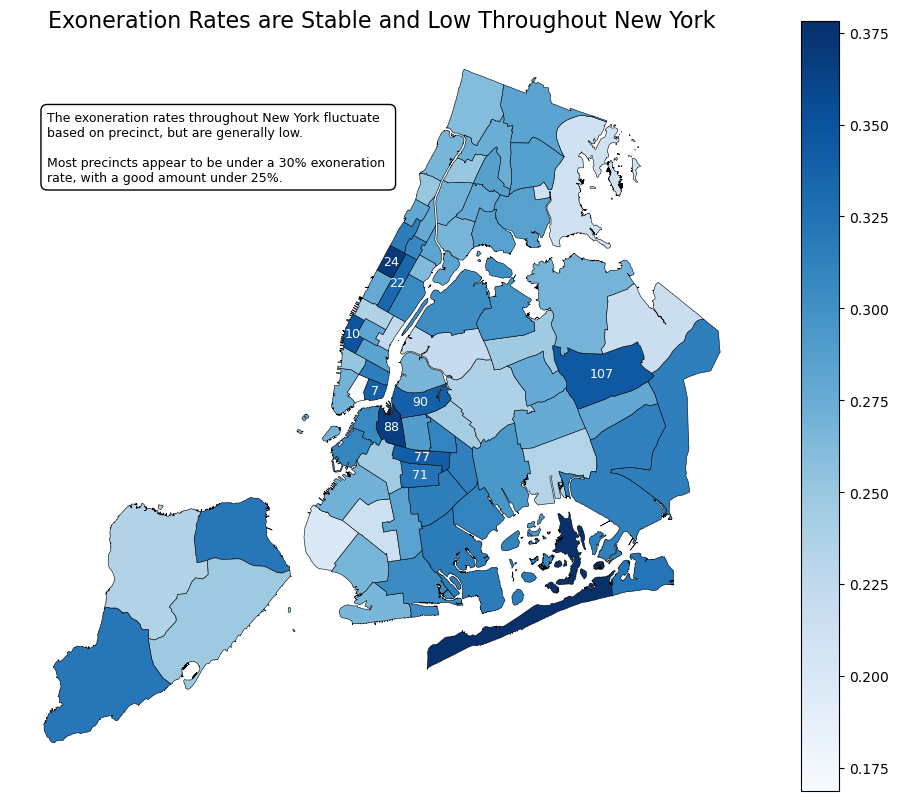

In [33]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load NYC precincts shapefile (GeoJSON)
precincts_gdf = gpd.read_file("nyc-police-precincts.geojson")

# Total complaints (regardless of disposition)
total_counts = df[df['precinct'].notna()]
total_counts['precinct'] = total_counts['precinct'].astype(int)
total_counts = total_counts.groupby('precinct').size().reset_index(name='total_count')



# Exonerated counts (you already did this)
exonerated = df[df['precinct'].notna()]
exonerated = exonerated[exonerated['board_disposition'] == 'Exonerated']
exonerated['precinct'] = exonerated['precinct'].astype(int)
exonerated_counts = exonerated.groupby('precinct').size().reset_index(name='exonerated_count')

# Merge total and exonerated counts
rates_df = pd.merge(total_counts, exonerated_counts, on='precinct', how='left')
rates_df['exonerated_count'] = rates_df['exonerated_count'].fillna(0)

# Calculate proportion
rates_df['exoneration_rate'] = rates_df['exonerated_count'] / rates_df['total_count']


precincts_gdf['precinct'] = precincts_gdf['precinct'].astype(int)

merged = precincts_gdf.merge(rates_df, on='precinct', how='left')


fig, ax = plt.subplots(1, 1, figsize=(12, 10))
merged.plot(column='exoneration_rate',
            ax=ax,
            legend=True,
            cmap='Blues',
            edgecolor='black',
            linewidth=0.4,
            missing_kwds={"color": "lightgrey", "label": "No Data"})

# ax.set_xlim(-74.3, -73.7)  # Zoom into a smaller area to emphasize certain precincts

top10_precincts = merged.nlargest(10, 'exoneration_rate')['precinct'].tolist()

# Add labels for top 10 precincts
for idx, row in merged.iterrows():
    if row['precinct'] in top10_precincts:
        if row['geometry'].centroid.is_empty:
            continue
        x, y = row['geometry'].centroid.coords[0]
        label = f"{int(row['precinct'])}"
        ax.text(x, y, label, fontsize=9, ha='center', va='center', color = 'white' if row['exoneration_rate'] > 0.3 else 'black')
ax.set_title("Exoneration Rates are Stable and Low Throughout New York", fontsize=16)
ax.axis(False)
ax.text(
    0.05, 0.8,  # X, Y position in *axes fraction* (from 0 to 1)
    'The exoneration rates throughout New York fluctuate\nbased on precinct, but are generally low.\n\nMost precincts appear to be under a 30% exoneration \nrate, with a good amount under 25%. ',
    fontsize=9,
    ha='left',  # horizontal alignment
    va='bottom', # vertical alignment
    transform=ax.transAxes,  # coordinate system: axes fraction
    bbox=dict(boxstyle='round,pad=0.5', facecolor='white', edgecolor='black')
)
plt.show()

